In [4]:
from clonotype_analyses.analyses import ClonotypeToolkits
from clonotype_analyses.analyses import ClonotypePreprocessing

In [5]:
import os

batch_info = []
for i in os.listdir('clinical_metadata'):
	prefix = i.replace('_clinical_metadata.tsv', '')
	tmp_dct = {
		'sample_name': prefix,
		'vdj_path': 'clonotypes/filtered_clonotypes/{}_vdj_t_filtered_contig_annotations.csv'.format(prefix),
		'clinical_meta_path': 'clinical_metadata/{}_clinical_metadata.tsv'.format(prefix),
	}
	batch_info.append(tmp_dct)

In [6]:
batch_info[:2]

[{'sample_name': 'GSM5613816_2021-04-29-0102_cDNA',
  'vdj_path': 'clonotypes/filtered_clonotypes/GSM5613816_2021-04-29-0102_cDNA_vdj_t_filtered_contig_annotations.csv',
  'clinical_meta_path': 'clinical_metadata/GSM5613816_2021-04-29-0102_cDNA_clinical_metadata.tsv'},
 {'sample_name': 'GSM5613808_2020-03-18-52-Dx',
  'vdj_path': 'clonotypes/filtered_clonotypes/GSM5613808_2020-03-18-52-Dx_vdj_t_filtered_contig_annotations.csv',
  'clinical_meta_path': 'clinical_metadata/GSM5613808_2020-03-18-52-Dx_clinical_metadata.tsv'}]

In [7]:
preprocessing_object = ClonotypePreprocessing(
	batch_info=batch_info
)

NOTE: barcodes (first column) of vdj and clinical_meta MUST have similar items


In [8]:
preprocessing_object.ingest_data(
	ouput_vdj_h5_path='vdj_h5.h5',
	ouput_clinical_h5_path='clinical_h5.h5'
)

/usr/local/lib/python3.11/site-packages/clonotype_analyses/common/__init__.py:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, df], **kwargs)


{'10X_VDJ': 'vdj_h5.h5', 'clinical_meta': 'clinical_h5.h5'}

In [9]:
toolkits = ClonotypeToolkits(
	vdj_h5_path='vdj_h5.h5',
	clinical_h5_path='clinical_h5.h5',
)

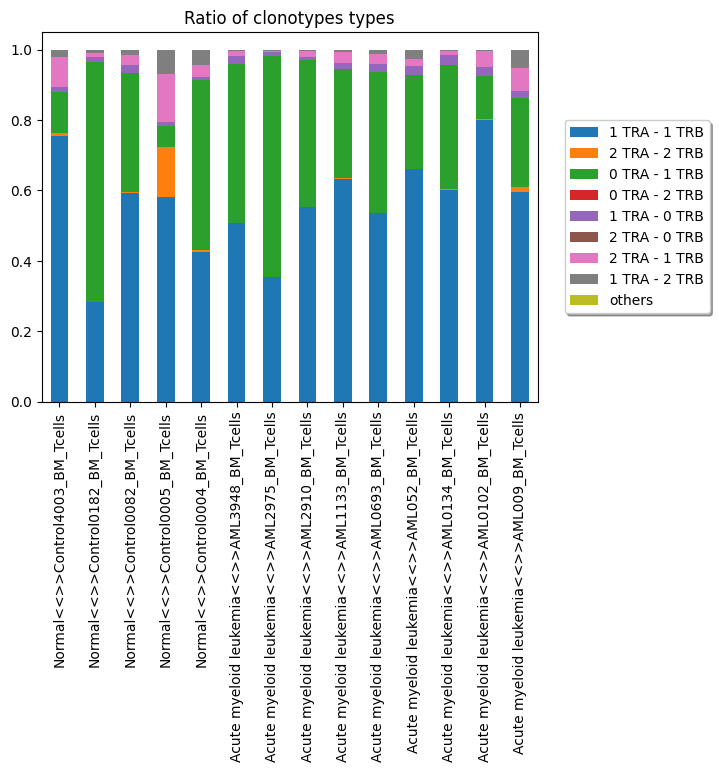

In [11]:
toolkits.matplotlib_clonotypes_QC_fraction(meta_keys=['Condition', 'Sample ID'])